# Exploring The Ford Gobike Dataset 
## by Muhammad Usman Siddiqui

## Preliminary Wrangling

> This data set contains data about individual rides made in a bike-sharing system. Two data sets are used; one is about the rides made in the San Francisco Bay Area, and one is about the rides made in New York City. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
# Reading the data set for San Francisco

df = pd.read_csv ('201902-fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
# Checking the datatypes and the nummber of null values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Getting a statistical overview of all the columns to make spotting outliers and future analyses easier.

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# Loading data set for New York City

df2 = pd.read_csv ('201902-citibike-tripdata.csv')
df2

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,219,2019-02-01 00:00:06.2570,2019-02-01 00:03:46.1090,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,1
1,143,2019-02-01 00:00:28.0320,2019-02-01 00:02:51.7460,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,25626,Subscriber,1990,1
2,296,2019-02-01 00:01:13.9870,2019-02-01 00:06:10.7340,3571.0,Bedford Ave & Bergen St,40.676368,-73.952918,3549.0,Grand Ave & Bergen St,40.678045,-73.962408,35568,Subscriber,1987,1
3,478,2019-02-01 00:01:14.1520,2019-02-01 00:09:12.7870,167.0,E 39 St & 3 Ave,40.748901,-73.976049,477.0,W 41 St & 8 Ave,40.756405,-73.990026,25045,Subscriber,1964,2
4,225,2019-02-01 00:01:49.3410,2019-02-01 00:05:34.4980,3458.0,W 55 St & 6 Ave,40.763094,-73.978350,3443.0,W 52 St & 6 Ave,40.761330,-73.979820,34006,Subscriber,1979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943739,979,2019-02-28 23:59:43.3860,2019-03-01 00:16:02.7620,2002.0,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,3656.0,E 2 St & Avenue A,40.723077,-73.985836,33630,Subscriber,1992,1
943740,779,2019-02-28 23:59:48.2220,2019-03-01 00:12:47.5150,229.0,Great Jones St,40.727434,-73.993790,519.0,Pershing Square North,40.751873,-73.977706,30765,Subscriber,1995,1
943741,699,2019-02-28 23:59:48.6480,2019-03-01 00:11:28.5880,494.0,W 26 St & 8 Ave,40.747348,-73.997236,487.0,E 20 St & FDR Drive,40.733143,-73.975739,19721,Subscriber,1996,1
943742,284,2019-02-28 23:59:59.2640,2019-03-01 00:04:43.6880,3660.0,W 16 St & 8 Ave,40.741022,-74.001385,3255.0,8 Ave & W 31 St,40.750585,-73.994685,27804,Subscriber,1985,1


In [6]:
# Checking the datatypes and the nummber of null values in the dataset

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943744 entries, 0 to 943743
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             943744 non-null  int64  
 1   starttime                943744 non-null  object 
 2   stoptime                 943744 non-null  object 
 3   start station id         943735 non-null  float64
 4   start station name       943735 non-null  object 
 5   start station latitude   943744 non-null  float64
 6   start station longitude  943744 non-null  float64
 7   end station id           943735 non-null  float64
 8   end station name         943735 non-null  object 
 9   end station latitude     943744 non-null  float64
 10  end station longitude    943744 non-null  float64
 11  bikeid                   943744 non-null  int64  
 12  usertype                 943744 non-null  object 
 13  birth year               943744 non-null  int64  
 14  gend

In [7]:
# Getting a statistical overview of all the columns to make spotting outliers and future analyses easier.

df2.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,9.437440e+05,943735.000000,943744.000000,943744.000000,943735.000000,943744.000000,943744.000000,943744.000000,943744.000000,943744.000000
mean,8.047733e+02,1614.552153,40.737283,-73.982164,1604.586391,40.737153,-73.982407,28968.990799,1979.224374,1.176684
std,7.509697e+03,1456.227953,0.030139,0.018546,1455.324186,0.029901,0.018603,6248.873530,12.176740,0.472637
min,6.100000e+01,72.000000,40.655400,-74.017134,72.000000,40.655400,-74.043991,14529.000000,1885.000000,0.000000
25%,3.150000e+02,382.000000,40.718822,-73.994564,380.000000,40.718822,-73.994685,26013.000000,1970.000000,1.000000
50%,5.180000e+02,507.000000,40.738274,-73.985011,507.000000,40.738274,-73.985649,30929.000000,1982.000000,1.000000
75%,8.790000e+02,3263.000000,40.756604,-73.972826,3263.000000,40.756405,-73.973442,34045.000000,1989.000000,1.000000
max,2.403037e+06,3745.000000,40.866000,-73.881000,3745.000000,40.866000,-73.881000,37907.000000,2003.000000,2.000000


In [8]:
# No duplicated rows in both data sets

sum(df2.duplicated())

0

### What is the structure of your dataset?

> The first data set has data for 183412 trips and 16 columns describing characteristics of each trip. The second data set has 943744 trips and 15 columns to describe each trip. The numerical values are of int and float data types. Other characteristics are of object data type. 

### What is/are the main feature(s) of interest in your dataset?
> I'm interested in finding insights about the type (age and gender) of population uses the bike share service, seeing how these different variables affect the trip duration, seeing if the service is used more at a particular time, and comparing the data of the two cities. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The tripduration, start time, user type, memeber birth year, and member gender columns contain most of the data worth exploring. The two different data sets provide an opportunity to compare the results of two cities. 

## The Data needs some cleaning

In [9]:
# Removing rows with null values in the member_gender and end_station_name columns

df = df[df['member_gender'].notnull()]
df = df[df['end_station_name'].notnull()]

In [10]:
# Checking to see if the change has been applied 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [11]:
# Some of the New York city data has zero for gender which corresponds to unkown as mentioned on the website
# These rows will be dropped 

indexl = df2[df2['gender'] == 0].index
df2.drop(indexl , inplace=True)

In [12]:
#There is a birth year of 1978 in df which means rider is 139 years old
#Longest life span recorded is 122 years so this is incorrect information by the user or an error
#All birth dates after 1897 are removed as user would be older than 122 otherwise

df = df[df.member_birth_year != 1878] 
df2 = df2[df2['birth year'] >= 1897 ]

## Univariate Exploration

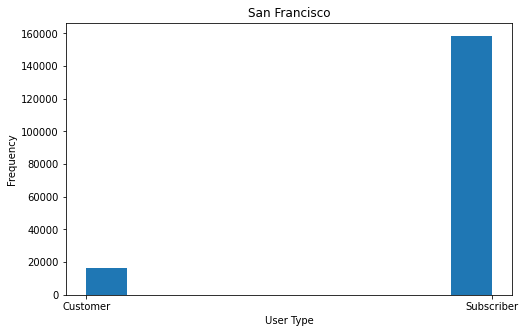

In [13]:
# Plotting a histogram for user type for San Francisco

plt.figure(figsize=[8, 5])
plt.hist(df['user_type'])
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('San Francisco')
plt.show()

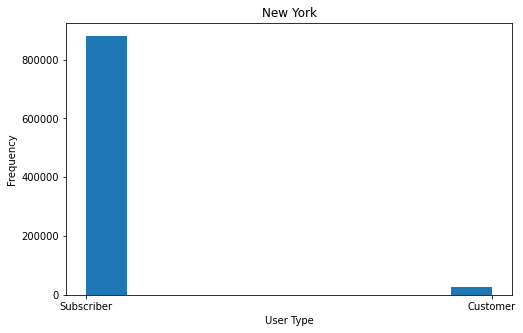

In [14]:
# Plotting a histogram for user type for New York

plt.figure(figsize=[8, 5])
plt.hist(df2['usertype'])
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('New York')
plt.show()

In [15]:
# This shows that the vast majority of the riders were Subscribers in both cities.
# Next I will look at the gender of the riders 

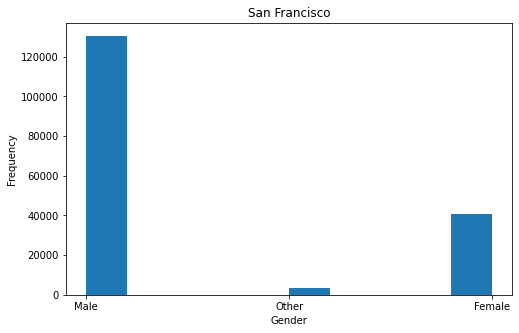

In [16]:
# Plotting a histogram of gender for San Francisco

plt.figure(figsize=[8, 5])
plt.hist(df['member_gender'].astype(str))
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('San Francisco')
plt.show()

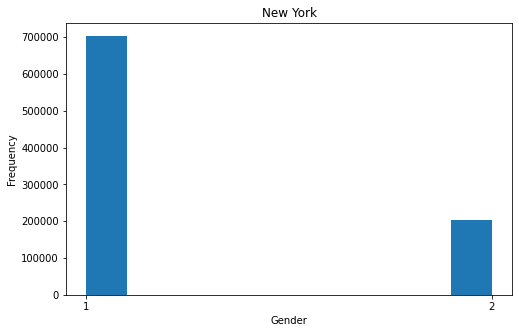

In [17]:
# Plotting a histogram of gender for New York

plt.figure(figsize=[8, 5])
plt.hist(df2['gender'].astype(str))
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('New York')
plt.show()

# 1 corresponds to male and 2 corresponds to female as metioned on the website

In [18]:
# This shows that the majority of the riders were Male in both cities.
# Next I will look at the birth year of riders

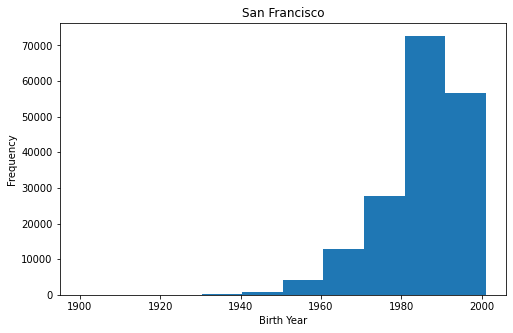

In [19]:
# Birth Year data histogram for SanFrancisco

plt.figure(figsize=[8, 5])
plt.hist(df['member_birth_year'])
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('San Francisco')
plt.show()

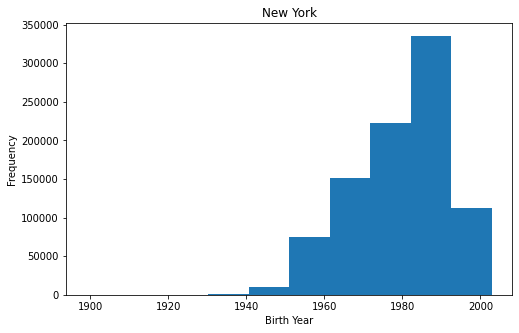

In [20]:
# Birth year data histogram for New York

plt.figure(figsize=[8, 5])
plt.hist(df2['birth year'])
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.title('New York')
plt.show()

In [21]:
#The histogram is skewed to the left, which means most riders had a higher birth year which means most riders were young
# Most riders were born after 1980. 
# In New York most riders were born between 1980 and 1990
# In San Francisco most riders were born after 1990.
# Next the trend of the trip duration is explored.

<ipython-input-22-0fdb80d25408>:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 10000, 0, 15000])


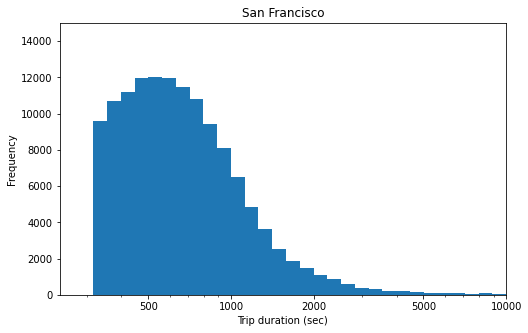

In [22]:
# The following plots are histograms of the trip duration for both cities.
# For San Francisco
# A log-log scale is used to plot the histogram as the data is very skewed.

binsize = 0.05
logb = 10 ** np.arange(2.5, np.log10(df['duration_sec'].max()) + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(df['duration_sec'], bins = logb)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, 1000, 2000, 5000, 10000])
plt.axis([0, 10000, 0, 15000])
plt.xlabel('Trip duration (sec)')
plt.ylabel('Frequency')
plt.title('San Francisco')
plt.show();



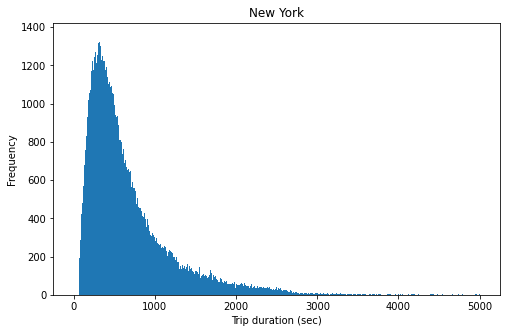

In [63]:
# For New York 
# Log-log not required as the normal plot conveys the trend well.

plt.figure(figsize=[8, 5])
plt.hist(df2['tripduration'], range(0, 5000))
plt.xlabel('Trip duration (sec)')
plt.ylabel('Frequency')
plt.title('New York');


In [24]:
# This shows that most of the trips were were less than 2000 seconds for both cities.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The plots show that most of the riders were subscribers, male, young (born after 1980), and had short trips (less than 2000 seconds).To produce a histogram easier to interpret as the data was very skewed for the San Franscio data duration time, a log log scale was used. After looking at the individual plots of the data, I will pose questions to find the interrelation between the different variables. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The trends are similar for both cities and the trends are all logical. All the rows containing null values were removed in the San Francisco data set to remove all the missing data and make the analysis more robust. All the rows with 0 for gender in the New York data set were removed a they correspond to unknown gender, unkown gender reduced the reliability of those rows, so they were removed.

## Bivariate Exploration

### Q: What is the relation between the trip duration and the year of birth?

In [25]:
# The mean trip duration in San Francisco

df.duration_sec.mean()

703.9983423930129

Text(0, 0.5, 'Trip duration (sec)')

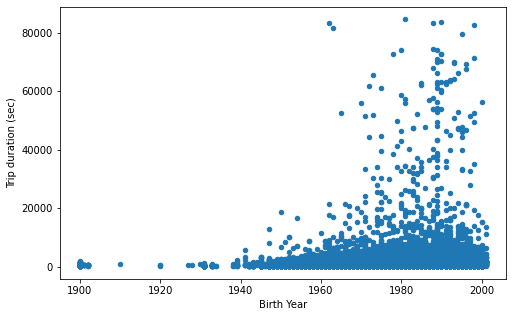

In [26]:
# Plotting a scatter plot of birth year vs trip duration.

plt.figure(figsize=[8, 5])
plt.scatter(df.member_birth_year, df.duration_sec, s = 20)
plt.xlabel('Birth Year')
plt.ylabel('Trip duration (sec)');

This plot shows that most of the trips with a long trip duration, greater than mean (704 sec), correspond to riders with a birth year later than 1980. That means riders with a longer duration tend to be mostly younger people (younger than 39).

There is an error here. The longest human lifespan recorded is 122 years. The data point with birth year of 1880 means the rider is 139 years old which is either inccorect informtion entered by the user or an error. This point will be removed. This will be done in the data cleaning step above, to implement it before the plots are created.

### Q: Does the gender affect the duration of the trip? 

In [27]:
# Resetting the index after as some rows were dropped earlier

df.reset_index(drop =True, inplace =True)

In [28]:
# Function to the obtain arrays of the trip duration, and the member birth year associated to each gender
# object refers to the gender ('Female' for example)
# array_age is an arry user will pass which will be returned with all birth years for that gender
# array_time is an arry user will pass which will be returned with all trip durations for that gender

def gender_duration(object, array_age = [], array_time = []) : 
    for i in range(0,174950):
        if df._get_value(i, 'member_gender') == object:
            array_time.append(df._get_value(i, 'duration_sec'))
            array_age.append(df._get_value(i, 'member_birth_year'))
    return [array_age, array_time]    

In [29]:
# Gathering the trip duration and member birth year data associated to all Male users
age_m = []
gend_m = []
gender_duration('Male', age_m, gend_m);

In [30]:
# Gathering the trip duration and member birth year data associated to all Female users
age_f = []
gend_f=[]
gender_duration('Female', age_f, gend_f);

In [31]:
# Gathering the trip duration and member birth year data associated to all Other users
age_o = []
gend_o = []
gender_duration('Other', age_o, gend_o);

Text(0, 0.5, 'Trip duration (sec)')

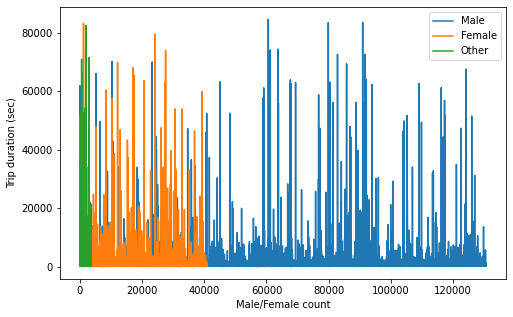

In [32]:
# Making the plot
plt.figure(figsize=[8, 5])
x = np.linspace(0,(len(gend_m)-1),len(gend_m))
x2 = np.linspace(0,(len(gend_f)-1),len(gend_f))
x3 = np.linspace(0,(len(gend_o)-1),len(gend_o))
plt.plot(x,gend_m)
plt.plot(x2,gend_f)
plt.plot(x3,gend_o)
plt.plot()
plt.legend(['Male', 'Female', 'Other'])
plt.xlabel('List index', size =10)
plt.ylabel('Trip duration (sec)', size = 10);

No clear trend can be seen between the gender and the trip duration. All the genders( male, female, and other) have had trips longer than average (704 sec) and trips shorter than average. There are more female users with a trip longer than average, but the data contains a lot more values for male users. Male riders could have a shorter mean trip duration simply because there is too much data, so we cannot conclude that female riders have longer trips. Therefore, no significant correlation between the trip duration and gender is seen.

### Q: Does the type of customer (Subscriber or not) affect the duration of the trip?

In [52]:
# Function to give arrays of the trip duration and the birth year associated to each user type

def type_duration(object, type_age, type_duration) : 
    for i in range(0,174950):
        if df._get_value(i, 'user_type') == object:
            type_duration.append(df._get_value(i, 'duration_sec')) 
            type_age.append(df._get_value(i, 'member_birth_year'))
    return (type_age, type_duration)

In [54]:
# Getting array of duration and birth year for Subscribers
age_sub = []
sub = []
type_duration('Subscriber', age_sub, sub);

In [55]:
# Getting array of duration and birth year for Customers
age_cust = []
cust = []
type_duration('Customer', age_cust, cust);

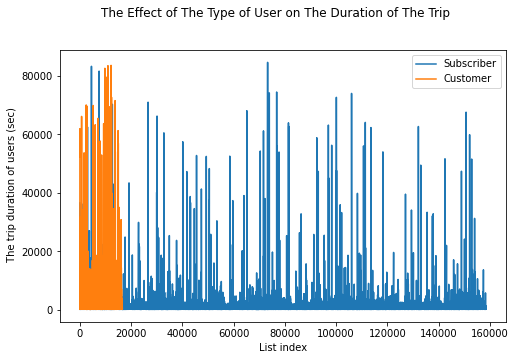

In [68]:
# Creating the plot
plt.figure(figsize=[8, 5])
x = np.linspace(0,(len(sub)-1),len(sub))
x2 = np.linspace(0,(len(cust)-1),len(cust))
plt.plot(x,sub)
plt.plot(x2,cust)
plt.plot
plt.suptitle("The Effect of The Type of User on The Duration of The Trip", y = 1)
plt.legend(['Subscriber', 'Customer'])
plt.xlabel('List index', size = 10)
plt.ylabel('The trip duration of users (sec)', size =10);

In [57]:
# Mean trip duration of customers

mean_cust = sum(cust)/len(cust)
mean_cust

1310.6462420766677

In [58]:
# Mean trip duration of subscribers

mean_sub = sum(sub)/len(sub)
mean_sub

640.5536382864539

It is seen that the customers tend to have a longer trip duration than subscribers. The plots show that and also the mean trip duration of customers is more than double of the mean trip duration of the subscribers. Therefore, the plot and the statistics support each other.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It appears that most of the longer trips are associated to younger users born after 1970. Furthermore, the data shows that gender does not have a significant effect on the trip duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that the customers tend to have a longer trip duration than subscribers. This is an interesting feature and such a relationship was not expected at the start of the exploration.

## Multivariate Exploration

### Exploring the relation between the year of birth, the trip duration, and gender.

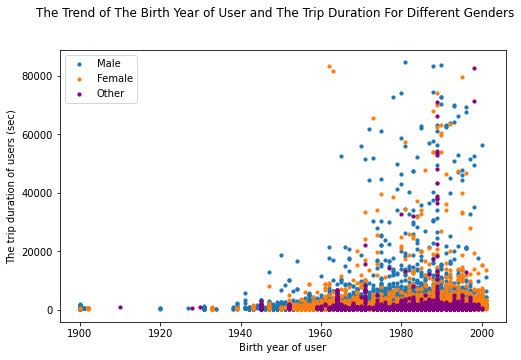

In [69]:
# Plotting the scatter plot of birth year vs trip duration for all three genders.
# To compare the trend for all three genders.
plt.figure(figsize=[8, 5])
plt.scatter(age_m , gend_m, s= 10)
plt.scatter(age_f, gend_f, s = 10)
plt.scatter(age_o, gend_o, s = 10, c = 'purple')
plt.legend(['Male', 'Female', 'Other'])
plt.suptitle("The Trend of The Birth Year of User and The Trip Duration For Different Genders", y = 1)
plt.xlabel('Birth year of user', size =10)
plt.ylabel('The trip duration of users (sec)', size =10);

For all genders, most of the longest trips are made by users with a birth year greater than 1970. This plot shows that all the genders follow the same general trend of trip duration and birth year. Most values of each are most populated at the bottom of the plot corresponding to a shorter trip duration. And there are a few points with a large trip duration, and this trend is the same for all the genders.  

### Exploring the relation between the year of birth, the trip duration, and the type of user.


Text(0, 0.5, 'Trip duration (sec)')

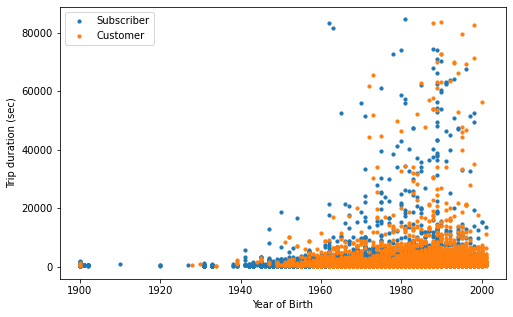

In [60]:
# Plotting the scatter plot of birth year vs trip duration for both user types.
# To compare the trends for both user types
plt.figure(figsize=[8, 5])
plt.scatter(age_sub , sub, s= 10)
plt.scatter(age_cust, cust, s = 10)
plt.legend(['Subscriber', 'Customer'])
plt.xlabel('Year of Birth', size =10)
plt.ylabel('Trip duration (sec)', size =10);

This plot again proves that most of the longer trips were undertaken by users born after 1970. This also shows that a greater proportion of customers took longer trips compared to the proportion of subscribers who took longer trips.

### Comparing the relation between the year of birth, and the trip duration, between San Francisco and New York.

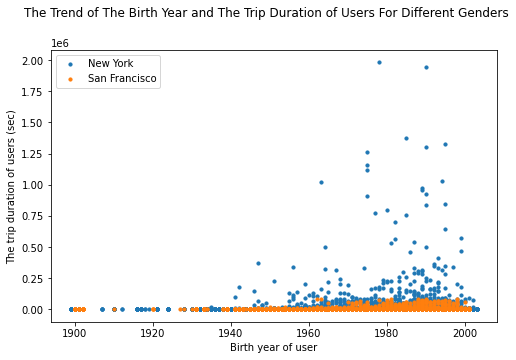

In [71]:
# Plotting the scatter plot of birth year vs trip duration for all users in both users
# To compare the trends in the two cities.
plt.figure(figsize=[8, 5])
plt.scatter(df2['birth year'], df2['tripduration'], s = 10)
plt.scatter(df['member_birth_year'], df['duration_sec'], s = 10)
plt.legend(['New York', 'San Francisco'])
plt.suptitle("The Trend of The Birth Year and The Trip Duration of Users For Different Genders", y = 1)
plt.xlabel('Birth year of user', size =10)
plt.ylabel('The trip duration of users (sec)', size =10);

In [61]:
# Mean trip duration of users in New York.
df2['tripduration'].mean()

756.8641932285744

Again, most of the longest trips were undertaken by users born after 1970 in both cities. However, it appears that longer trips were taken in New York than in San Francisco. The longest trip taken in New York is much higher than the longest trip taken in San Francisco. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> All the plots reinforced that users borth after 1970 took most of the longest trips regardless of gender, type, and city. The trend of trip duration and birth year is similar for all genders. This means gender does not significantly effect the trip duration which was reinforces the results of the bivariate exploration. 

### Were there any interesting or surprising interactions between features?

> One surprising feature is discovered was that longer trips were taken in New York, and the longest trip in New York was much longer than the longest trip in San Francisco. But, the average trip duration was similar for both cities, 704 sec for San Francisco and 757 sec for New York.